In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
ds = pd.read_csv('/content/Housing.csv')

In [4]:
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
ds.isnull().sum()

In [6]:
ds.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
ds.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


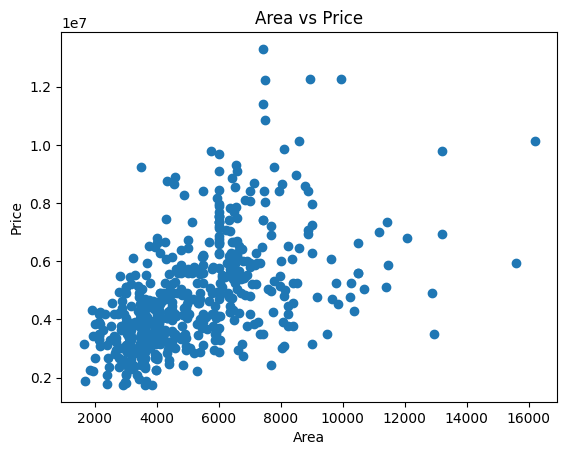

In [8]:
plt.scatter(ds['area'], ds['price'])
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

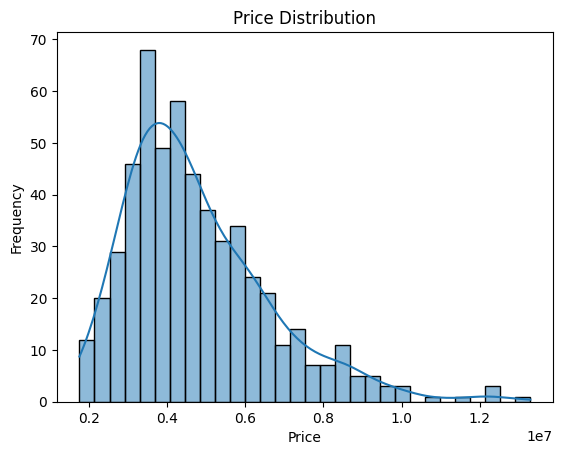

In [9]:
sns.histplot(ds['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Feature** **Engineering**

In [28]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ds[['stories', 'parking', 'bathrooms','area']])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

**SGD** **Regressor**

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_poly, y)

SGDRegressor()

**Ridge and Lasso Regression**

In [32]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_poly, y)
lasso.fit(X_poly, y)

Lasso(alpha=0.1)

**Linear Regression**

In [34]:
# fit model
X = ds[['stories', 'parking', 'bathrooms','area','bedrooms']]
y = ds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
# evaluate model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 2292721545725.5215
R^2 Score: 0.5464062355495556


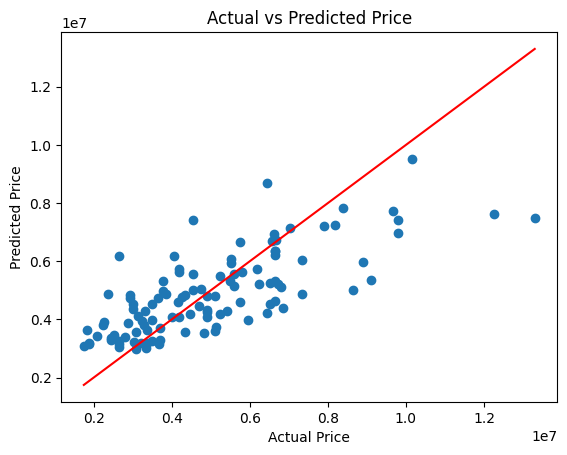

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # 45-degree line
plt.show()


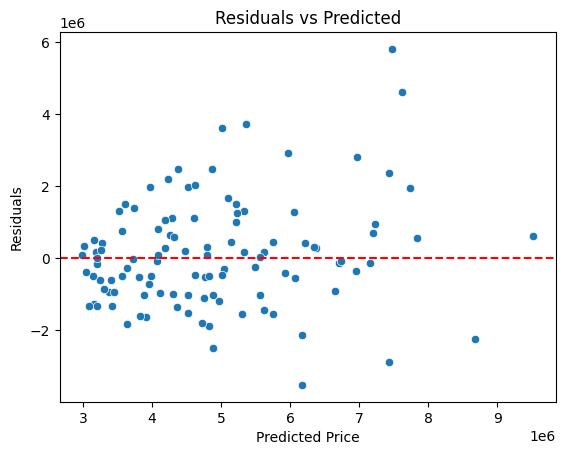

In [42]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

# Convert target to binary classification
y_train_class = y_train > 5000000
y_test_class = y_test > 5000000

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train_class)

# Predict and evaluate
y_pred_class = log_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.7614678899082569
F1 Score: 0.6829268292682927


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Plot Learning Curves**

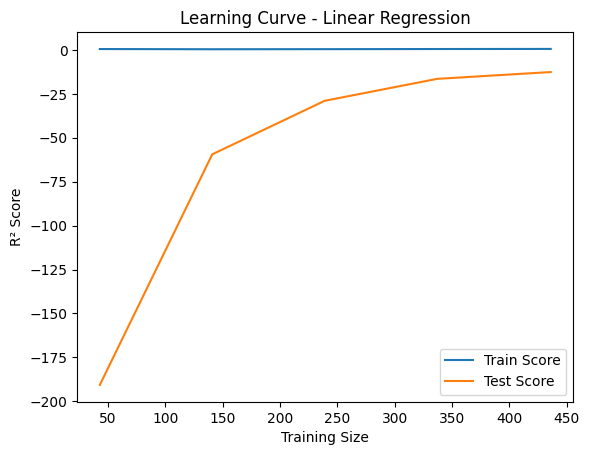

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_poly, y, cv=5, scoring='r2')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.legend()
plt.title("Learning Curve - Linear Regression")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.show()


In [37]:
# find f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1127483.3523235444


In [38]:
# Convert price into categories (e.g., expensive or cheap)
y_test_class = y_test > 5000000
y_pred_class = y_pred > 5000000

from sklearn.metrics import f1_score
f1 = f1_score(y_test_class, y_pred_class)
print(f"F1 Score: {f1}")


F1 Score: 0.7692307692307693


In [39]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_ridge = GridSearchCV(Ridge(), params, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_poly, y)
print(f"Best Ridge Alpha: {grid_ridge.best_params_}")


Best Ridge Alpha: {'alpha': 0.01}
